In [17]:
import pandas as pd

from openff.evaluator.utils.timeseries import analyze_time_series

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.

****** PyMBAR will use 64-bit JAX! *******
* JAX is currently set to 32-bit bitsize *
* which is its default.                  *
*                                        *
* PyMBAR requires 64-bit mode and WILL   *
* enable JAX's 64-bit mode when called.  *
*                                        *
* This MAY cause problems with other     *
* Uses of JAX in the same code.          *
******************************************



In [2]:
df = pd.read_csv("equilibration_data.csv")
df

,Time (ns),Property,Value,Id,batch_id,group_id,full_id,Substance,Substance_,Box,Component 1,Component 2,Temperature (K),Pressure (Pa)
0,0.01,Potential Energy (kJ/mole),35306.584935,004019ab748046d8a7299852176ad862,eeb92f8e748e4f17a7b1f242a4620173,sage-2-0-0_1,eeb92f8e748e4f17a7b1f242a4620173_004019ab74804...,BrCCCCBr,BrCCCCBr,BrCCCCBr (eeb92f8e748e4f17a7b1f242a4620173_004...,BrCCCCBr,CCCCOC(=O)CCC,298.15,101.0
1,0.02,Potential Energy (kJ/mole),27853.665618,004019ab748046d8a7299852176ad862,eeb92f8e748e4f17a7b1f242a4620173,sage-2-0-0_1,eeb92f8e748e4f17a7b1f242a4620173_004019ab74804...,BrCCCCBr,BrCCCCBr,BrCCCCBr (eeb92f8e748e4f17a7b1f242a4620173_004...,BrCCCCBr,CCCCOC(=O)CCC,298.15,101.0
2,0.03,Potential Energy (kJ/mole),23866.691104,004019ab748046d8a7299852176ad862,eeb92f8e748e4f17a7b1f242a4620173,sage-2-0-0_1,eeb92f8e748e4f17a7b1f242a4620173_004019ab74804...,BrCCCCBr,BrCCCCBr,BrCCCCBr (eeb92f8e748e4f17a7b1f242a4620173_004...,BrCCCCBr,CCCCOC(=O)CCC,298.15,101.0
3,0.04,Potential Energy (kJ/mole),22470.492316,004019ab748046d8a7299852176ad862,eeb92f8e748e4f17a7b1f242a4620173,sage-2-0-0_1,eeb92f8e748e4f17a7b1f242a4620173_004019ab74804...,BrCCCCBr,BrCCCCBr,BrCCCCBr (eeb92f8e748e4f17a7b1f242a4620173_004...,BrCCCCBr,CCCCOC(=O)CCC,298.15,101.0
4,0.05,Potential Energy (kJ/mole),21220.216154,004019ab748046d8a7299852176ad862,eeb92f8e748e4f17a7b1f242a4620173,sage-2-0-0_1,eeb92f8e748e4f17a7b1f242a4620173_004019ab74804...,BrCCCCBr,BrCCCCBr,BrCCCCBr (eeb92f8e748e4f17a7b1f242a4620173_004...,BrCCCCBr,CCCCOC(=O)CCC,298.15,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164739,5.56,Density (g/mL),0.873607,ffaac3b2cad94d0c8a2b23f0d08e488c,eeb92f8e748e4f17a7b1f242a4620173,sage-2-0-0_1,eeb92f8e748e4f17a7b1f242a4620173_ffaac3b2cad94...,CC(=O)N(C)C{solv}{x=0.503000}|CCCCCCCl{solv}{x...,CC(=O)N(C)C (0.50) + CCCCCCCl (0.50),CC(=O)N(C)C{solv}{x=0.503000}|CCCCCCCl{solv}{x...,CC(=O)N(C)C,CCCCCCCl,298.15,100.0
3164740,5.57,Density (g/mL),0.879983,ffaac3b2cad94d0c8a2b23f0d08e488c,eeb92f8e748e4f17a7b1f242a4620173,sage-2-0-0_1,eeb92f8e748e4f17a7b1f242a4620173_ffaac3b2cad94...,CC(=O)N(C)C{solv}{x=0.503000}|CCCCCCCl{solv}{x...,CC(=O)N(C)C (0.50) + CCCCCCCl (0.50),CC(=O)N(C)C{solv}{x=0.503000}|CCCCCCCl{solv}{x...,CC(=O)N(C)C,CCCCCCCl,298.15,100.0
3164741,5.58,Density (g/mL),0.882274,ffaac3b2cad94d0c8a2b23f0d08e488c,eeb92f8e748e4f17a7b1f242a4620173,sage-2-0-0_1,eeb92f8e748e4f17a7b1f242a4620173_ffaac3b2cad94...,CC(=O)N(C)C{solv}{x=0.503000}|CCCCCCCl{solv}{x...,CC(=O)N(C)C (0.50) + CCCCCCCl (0.50),CC(=O)N(C)C{solv}{x=0.503000}|CCCCCCCl{solv}{x...,CC(=O)N(C)C,CCCCCCCl,298.15,100.0
3164742,5.59,Density (g/mL),0.881412,ffaac3b2cad94d0c8a2b23f0d08e488c,eeb92f8e748e4f17a7b1f242a4620173,sage-2-0-0_1,eeb92f8e748e4f17a7b1f242a4620173_ffaac3b2cad94...,CC(=O)N(C)C{solv}{x=0.503000}|CCCCCCCl{solv}{x...,CC(=O)N(C)C (0.50) + CCCCCCCl (0.50),CC(=O)N(C)C{solv}{x=0.503000}|CCCCCCCl{solv}{x...,CC(=O)N(C)C,CCCCCCCl,298.15,100.0


In [3]:
df.columns

Index(['Time (ns)', 'Property', 'Value', 'Id', 'batch_id', 'group_id',
       'full_id', 'Substance', 'Substance_', 'Box', 'Component 1',
       'Component 2', 'Temperature (K)', 'Pressure (Pa)'],
      dtype='object')

In [4]:
smi1 = "CN(CCO)CCO"

In [12]:
subdf = df[
    (df["Component 1"] == smi1)
    & (df["Component 2"] == "c1ccncc1")
    & (df["Box"] == "CN(CCO)CCO{solv}{x=0.473760}|c1ccncc1{solv}{x=0.526240} (eeb92f8e748e4f17a7b1f242a4620173_31fa9a93c2bd4fa99baf43db54feace5)")
]

In [13]:
vals = subdf[subdf.Property == "Potential Energy (kJ/mole)"]

<Axes: xlabel='Time (ns)'>

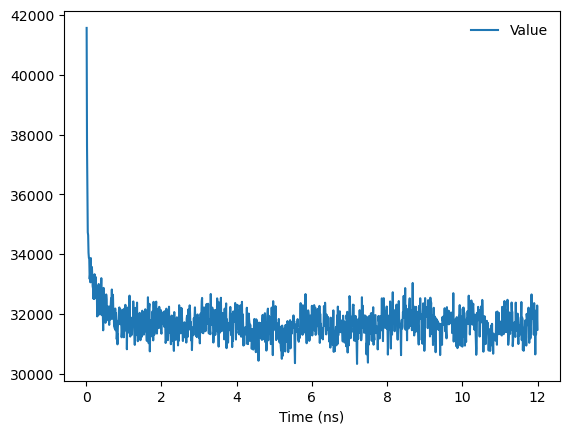

In [16]:
vals.plot("Time (ns)", "Value")

In [26]:
for i in range(0, 1000, 100):

    index = analyze_time_series(
        vals.Value.values, discard_initial_frames=i
    ).equilibration_index
    print(f"Discard {i}: {index}")

Discard 0: 168
Discard 100: 168
Discard 200: 200
Discard 300: 336
Discard 400: 546
Discard 500: 546
Discard 600: 685
Discard 700: 700
Discard 800: 1085
Discard 900: 1085


In [11]:
vals.Box.unique()

array(['CN(CCO)CCO (eeb92f8e748e4f17a7b1f242a4620173_31fa9a93c2bd4fa99baf43db54feace5)',
       'c1ccncc1 (eeb92f8e748e4f17a7b1f242a4620173_31fa9a93c2bd4fa99baf43db54feace5)',
       'CN(CCO)CCO{solv}{x=0.473760}|c1ccncc1{solv}{x=0.526240} (eeb92f8e748e4f17a7b1f242a4620173_31fa9a93c2bd4fa99baf43db54feace5)',
       'CN(CCO)CCO{solv}{x=0.473530}|c1ccncc1{solv}{x=0.526470} (eeb92f8e748e4f17a7b1f242a4620173_cdc750b42c8c45ef8478285fe428ee2c)'],
      dtype=object)

In [ ]:
va